In [1]:
import numpy as np

In [2]:
def func(x):
    return np.sin(2 * np.pi * x) + np.cos(2 * np.pi * x / 0.1)

In [3]:
size = 200
rng = np.random.RandomState(1234)
x_train = rng.uniform(0.0, 1.0, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0.0, 1.0, 100)

In [4]:
from sklearn.linear_model import BayesianRidge

n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

In [5]:
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

Matplotlib is building the font cache; this may take a moment.


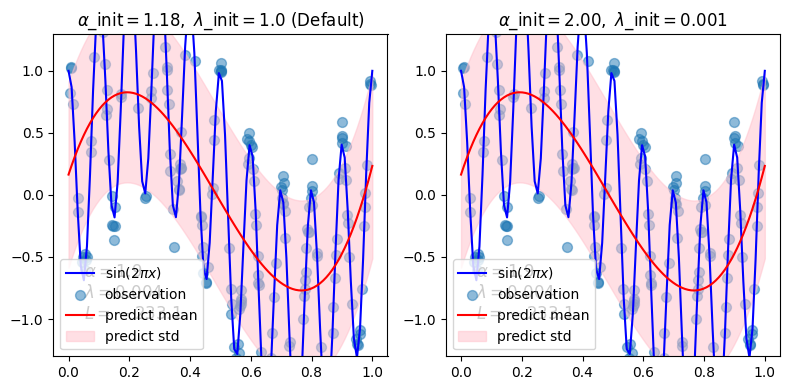

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [2.0, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(
        x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std"
    )
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

In [7]:
from sklearn.ensemble import ExtraTreesRegressor

In [8]:
reg_dt = ExtraTreesRegressor(n_estimators=100)

In [9]:
reg_dt = reg_dt.fit(X_train, y_train)

In [10]:
ymean = reg_dt.predict(X_test)

In [11]:
ymean

array([ 0.82466781,  0.98609889,  0.42100999, -0.07620788, -0.39626703,
       -0.55526749, -0.4591884 ,  0.16639241,  0.78925118,  1.2529567 ,
        1.51046885,  1.44576822,  0.90130967,  0.44788978,  0.01839126,
       -0.11959323,  0.1952642 ,  0.79211709,  1.5066164 ,  1.86935133,
        2.12758948,  1.73259183,  1.20806659,  0.63659843,  0.3534406 ,
       -0.01684272,  0.27507301,  0.79984158,  1.40453448,  1.88340574,
        2.00387308,  1.68482423,  1.00265131,  0.30648246, -0.04606348,
       -0.1424196 ,  0.04579345,  0.49229171,  1.16995063,  1.36801517,
        1.29953744,  1.11332786,  0.49472975,  0.0081678 , -0.62968831,
       -0.65295788, -0.32419148,  0.04663818,  0.74141742,  1.00354822,
        0.96975428,  0.27086764, -0.38523003, -0.92317384, -1.23161269,
       -1.39125223, -0.89838502, -0.22822207,  0.39241984,  0.42747179,
        0.26747015, -0.18490463, -0.75405807, -1.36958457, -1.73802573,
       -1.66226118, -1.3598684 , -0.76503734, -0.41359316,  0.01

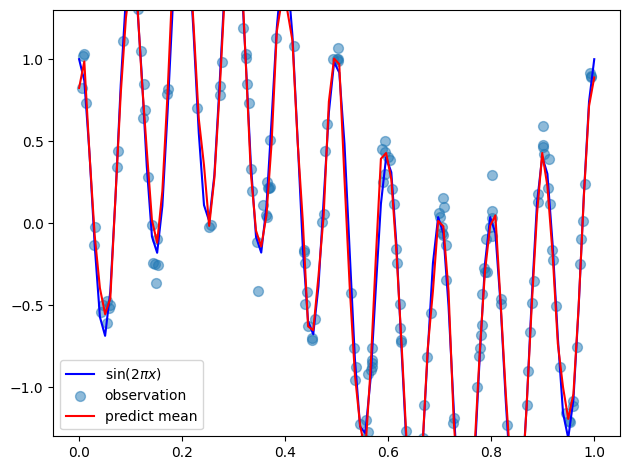

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()



ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
ax.plot(x_test, ymean, color="red", label="predict mean")

ax.set_ylim(-1.3, 1.3)
ax.legend()
title = ""

ax.set_title(title, fontsize=12)
text = ""
ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()


In [13]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF

In [14]:
kernel =  RBF(length_scale=10) + WhiteKernel() #+ DotProduct() ##+ 
gpr = GaussianProcessRegressor(kernel=kernel,
        random_state=0)

In [15]:
gpr = gpr.fit(X_train, y_train)

In [16]:
ymean = gpr.predict(X_test)

In [17]:
ymean

array([ 1.13689576,  0.86366666,  0.42122468, -0.0742743 , -0.45920848,
       -0.58074873, -0.36319395,  0.14806239,  0.78937412,  1.33366532,
        1.57867733,  1.433025  ,  0.96201919,  0.36933684, -0.08304312,
       -0.18553003,  0.12655842,  0.74273334,  1.42507256,  1.91118266,
        2.02297276,  1.73274224,  1.16387608,  0.53558001,  0.08047326,
       -0.03508431,  0.23316743,  0.78871406,  1.42124318,  1.87887005,
        1.96716143,  1.636098  ,  1.01019954,  0.3382787 , -0.11834488,
       -0.20233288,  0.08038819,  0.58411531,  1.10171397,  1.4427081 ,
        1.47869824,  1.1682979 ,  0.58305598, -0.08438333, -0.57610317,
       -0.68949318, -0.38785043,  0.17840056,  0.74483067,  1.0487215 ,
        0.94065138,  0.45232451, -0.2270386 , -0.86093732, -1.26159806,
       -1.30379566, -0.94866077, -0.33870343,  0.21353631,  0.44159453,
        0.2838669 , -0.17371589, -0.78442825, -1.37834738, -1.76690927,
       -1.74563052, -1.31247863, -0.7833814 , -0.35960684, -0.02

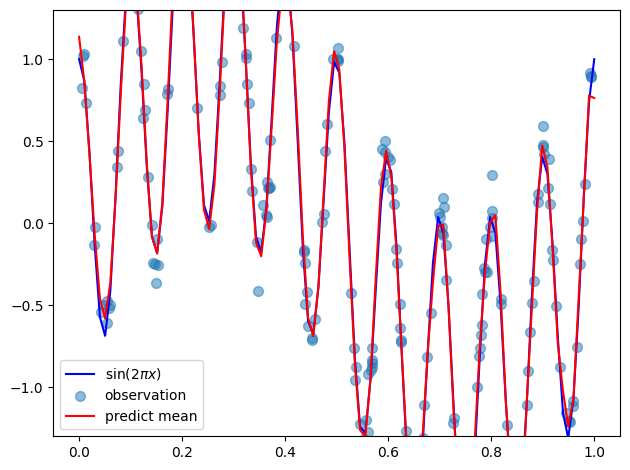

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()



ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
ax.plot(x_test, ymean, color="red", label="predict mean")

ax.set_ylim(-1.3, 1.3)
ax.legend()
title = ""

ax.set_title(title, fontsize=12)
text = ""
ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

In [19]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [20]:
reg = reg.fit(X_train, y_train)

In [21]:
ymean = reg.predict(X_test)

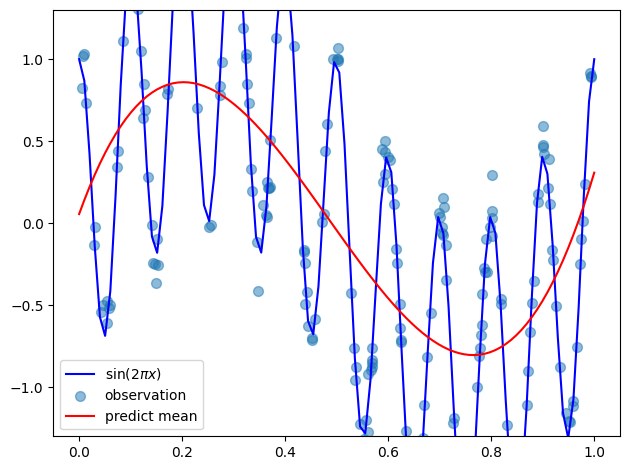

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()



ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
ax.plot(x_test, ymean, color="red", label="predict mean")

ax.set_ylim(-1.3, 1.3)
ax.legend()
title = ""

ax.set_title(title, fontsize=12)
text = ""
ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()